## Parto Segro's Safe Driver Prediciton
- 브라질의 보험사. 자동차, 주택 소유자 보험 회사
- 운전자 보험 -> 위험군/안전군 운전자 분류 예측 문제
- 안전하게 타고 다니는 사람은 보험료가 많다고 느껴질 것이고 위험하게 타고 다니는 사람은 보험료를 고민하지 않을 것. 결국 안전한 운전자는 보험에서 이탈하게 되고 위험운전자만 보험에 남아있게 됨.
- 기계학습 고도화, 성능 향상, 머신러닝으로 예측

Data Preparation & Exploration kernel
https://www.kaggle.com/bertcarremans/data-preparation-exploration

In [1]:
# aim -> getting a good insight in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100) # python 에서 보는 옵션 설정하는 방법
# columns 를 100개까지. 이외에도 display.max_rows / display.width / display.max_colwidth 등이 있음.
# column 이 길어서 중간에 ... 으로 나오고 스킵되는걸 100개까지 나오게 하는 것.
%matplotlib inline

sns.set(style='white', context='notebook')

In [2]:
train = pd.read_csv('./input/train (2).csv')
test = pd.read_csv('./input/test (2).csv')

In [3]:
train.head()
# cat -> category / bin -> binary / 아무것도 없는건 그냥 숫자나 순서형. 비슷한 그룹에 태그 되었음.
# 아직은 column이 의미하는걸 잘 모르겠음 -> 기본적인 설명은 데이터 제공한 페이지에 있음

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


데이터 종류
Binary variable, categorical variable, other variable integer or float values
-1 variable = missing values
Target variable and ID variable

In [5]:
train.shape
# 데이터 595212 개. 변수 59개

(595212, 59)

In [6]:
train.drop_duplicates() # duplicate : 복사하다, 다시하다. drop duplicate -> 중복값 제거
train.shape
# 중복이 없어서 제거 안됐음

(595212, 59)

In [7]:
test.shape
# train data 에 비해 column 이 하나 부족. -> target data 가 test set 에는 없으니까

(892816, 58)

In [8]:
train.info()
# 처음에 보기 설정을 해놨기 때문에 잘리지 않고 다 나옴.
# info() : check data type, null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [9]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [ ]:
"""
# Meta data
# To facilitate the data management, we'll store meta-information about the variables in a DataFrame
# 데이터를 관리하기 위해서 메타 정보가 들어간 DF를 만든다. 
# info() 와 초기에 주어진 데이터 정보를 바탕으로 제작
# role, level, keep, dtype
# role : input, ID, target / level : nominal, interval, ordinal, binary / keep : True or False / dtype : int, float, str 
data = []
for f in train.columns:
    # defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:                   <--- 이 부분에 오류가 조금 있음
        level = 'ordinal'                             elif 말고 else: 로 바꿔줘야함
        
    # initialize keep to True for all variable except for id
    keep = True
    if f == 'id':
        keep = False
        
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all th metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

# nominal : 명목형 / ordinal : 순서형, 서수형
# role, level, keep 이 의미하는 것?
"""

In [11]:
data = []
for f in train.columns:
    # defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    else:
        level = 'ordinal'
        
    # initialize keep to True for all variable except for id
    keep = True
    if f == 'id':
        keep = False
        
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all th metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

메타 정보가 들어간 데이터프레임을 왜 만드는지 모르겠음. 

In [12]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [13]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [14]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()
# groupby().size() : 집단의 크기
# 결과가 다름.

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [15]:
v = meta[(meta.level=='interval') & (meta.keep)].index
v
# 뒤에 .index 붙이면 이렇게 조건에 만족하는 인덱스 리스트가 나오고 index 안붙으면 df 가 나옴. 

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [16]:
# Descriptive statistics
# Interval variables
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()
# pd.index(data, dtype 등) -> data = array-like(1-dimensional)

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


- reg variable
ps_reg_03 에서 -1 값 발견 -> 결측치 존재
- car variable
12, 14 에서 -1 -> 결측치 존재
- calc variable
결측치 없음. 분포가 비슷한 것도 있고 다 다른 것도 있고 그럼. -> 스케일링 필요 느낌

이미 스케일링 된 데이터일까? 그건 확인할 수가 없지만 일단 데이터를 보고 이런 생각들을 해야함.

In [17]:
# Ordinal variable
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


ps_car_11 에서만 결측치 발견
다른 범위에 스케일링 처리 적용?

In [18]:
# Binary variable
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


target data에서 1이 차지하는 비중이 0.0365 -? 3.65% 밖에 안됨. 0 이 너무 많아서
균형이 맞지 않는 데이터임.imbalanced classes -> 처리하는 방법이 있음
records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. 
이러한 불균형 데이터를 모델 학습이 제대로 이루어지지 않게 한다. 모두 0으로만 해도 96% 정확도를 갖게 되니까
1. oversampling records with target = 1
2. undersampling records with target = 0
이외의 다른 방법들도 있음

In [19]:
# Handling imbalanced classes
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to fet at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


undersample 을 진행하였고 어느 정도 비중을 언더샘플링 할 것인지 몇 개 인지 구하고
언더샘플링을 진행. shuffle() 함수를 통해 랜덤으로 뽑았음.
그래서 언더샘플링한 리스트랑 1이 있던 리스트랑 합쳐서 새로운 train 셋을 만듬.

In [20]:
train.shape
# 처음에 비해 train set 의 개수가 줄어든 것을 알 수 있다.

(216940, 59)

In [21]:
# Data Quality Checks
# checking missing values : -1 이 결측치 -> -1 을 찾자
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
            
print('In toral, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In toral, there are 12 variables with missing values


ps_reg_03, ps_car_03, ps_car_05, ps_car_14 결측치가 다수 존재.
이 결측치들 많은 columns 를 어떻게 처리할 것인가

In [22]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1) # drop columns
meta.loc[(vars_to_drop), 'keep'] = False # Updating the meta. keep 에 False 입력

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

 <결측치 채우는 방법>
sklearn.preprocessing.Imputer
default => Imputer(missing_values='NaN', strategy='mean, median, most_frequent', axis=0, verbose=0, copy=True)
Imputer 를 만들어줌. 만든 걸 가지고 이후에 fit 시켜야함
missing_values : 데이터 프레임 내에서 결측치 표시된 것 요소. -1, 0, NaN 등이 있을 수 있음
strategy : 대신 뭘로 채울 것인지
axis : 행 or 열
verbose : control the verbosity of imputer

Method
fit(X [ ,y])
fit_transform(X[ ,y])
get_params, set_params, transform(X) 등이 있음

fit_transform -> X : numpy array of shape(training set)
y : numpy array of shape(target values)

ravel() : reshape 의 반대가 ravel. flatten 과 동일. 평평하게 펴줌.
array([0,1,2,3]) -> array([[0,1],
                          [2,3]])
                          
   -> 방향으로 변화 시키는게 reshape / <- 방향으로 변화시키는게 ravel 

In [23]:
# checking the cardinality of the categorical variable
v = meta[(meta.level == 'nominal') & (meta.keep)].index
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [24]:
train['ps_ind_02_cat'].value_counts().shape
# value_counts 하면 열의 개수를 안나오고 행만 존재하니까 행의 개수만 나옴.
# 그래서 행의 개수 알기 위해서 shape[0] 하면 행의 개수가 나오고.
# 명목형 변수니까 value_counts 의 행의 개수가 곧 명목형 카테고리의 개수 인 것을 알 수 있음.  

(5,)

.shape() 는 몇 행, 몇 열로 구성되었는지 알려주니까
shape[0] : 행의 개수 / shape[1] : 열의 개수 알려줌.
ps_car_11_cat 만 카테고리가 104개로 굉장히 많은 것을 알 수 있음.

assert : python 뿐 아니라 다른 언어에도 존재
assert 뒤의 조건이 True 가 아니면 Error 를 발생시킨다. 가정 설명문.

전처리(preprocessing) / 인코딩(encoding)
컴퓨터가 처리할 수 있는 데이터는 숫자 밖에 없음. 문서, 이미지, 음성, 영상 등 처리하기 위해서는 전처리/인코딩 과정을 통해야함. 컴퓨터가 처리할 수 있는 숫자 데이터로 바꿔주는 과정을 전처리/인코딩 과정이라고 한다. 

In [25]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features 

# encoding
def add_noise(series, noise_level):
    return series*(1+noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    # compute smoothing
    smoothing = 1/(1+np.exp(-(averages['count'] - min_samples_leaf)/smoothing))
    # apply average function to all target data
    prior = target.mean()
    # the bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    # apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name), 
        averages.reset_index().rename(columns={'index':target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [26]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [27]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

encoding 인데 이걸로 뭘 하려고 했는지 잘 모르겠음.
코드가 너무 복잡하고 설명이 많지 않음.
다만 메타 DF 을 만든 이유는 column 이 너무 많아서 for 문으로 통제하기 위해서 만들었지 않나라는 생각이 든다.

groupby 를 사용하면 size, max, mean, sum, count 등의 함수를 사용할 수 있는데, 이를 한번에 여러개 사용하기 위해서는 grouped.agg() 가 필요하다.
.agg() : agg(['sum', 'mean', 'count']) 이런식으로 사용하면 된다.
그 결과 옆으로 sum, mean, count 가 순서대로 나온다.
혹은 function_list=['size', 'sum', 'mean'] 해두고
grouped.agg(function_list)
이렇게 입력해줘도 동일한 결과가 출력된다.
groupby 한 데이터의 여러가지 통계 수치를 보고 싶을 때 사용하면 된다.   

<Figure size 432x288 with 0 Axes>

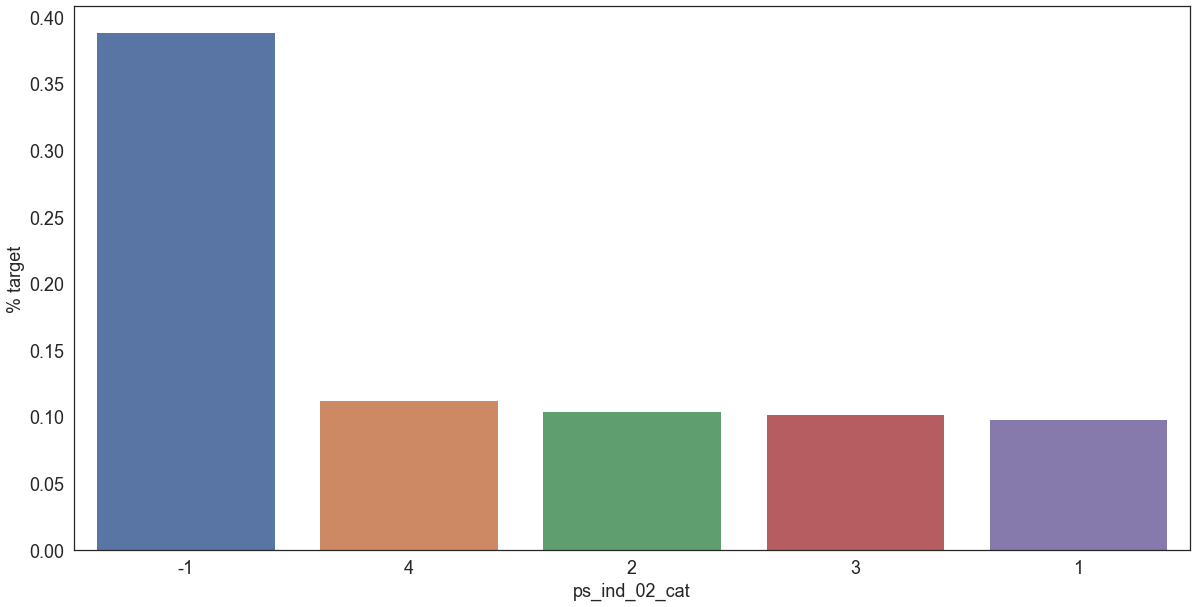

<Figure size 432x288 with 0 Axes>

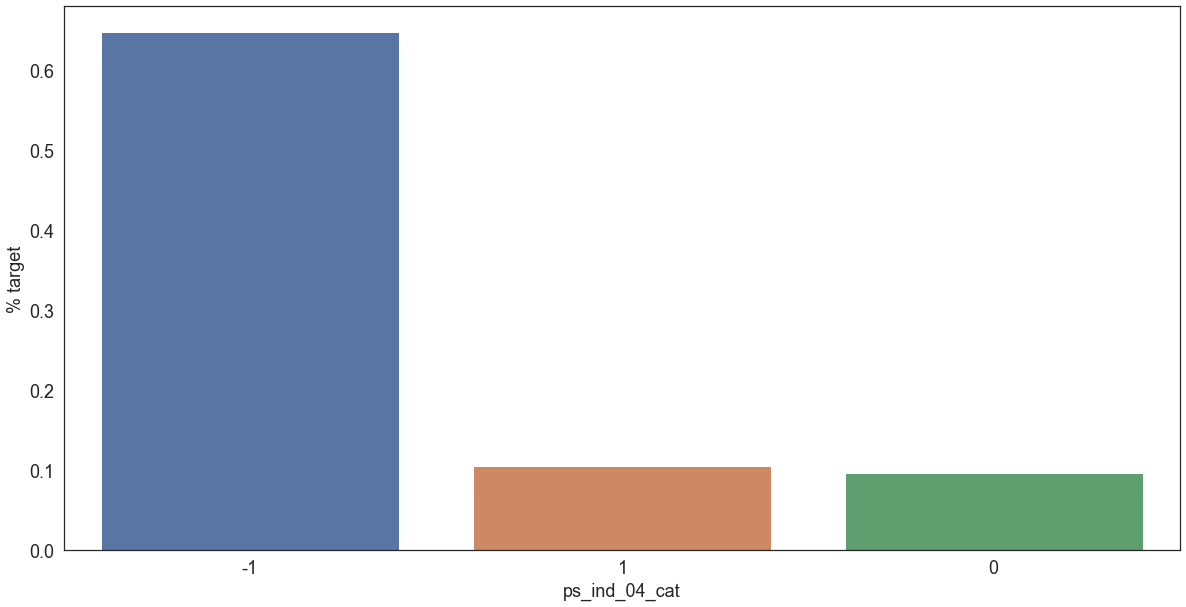

<Figure size 432x288 with 0 Axes>

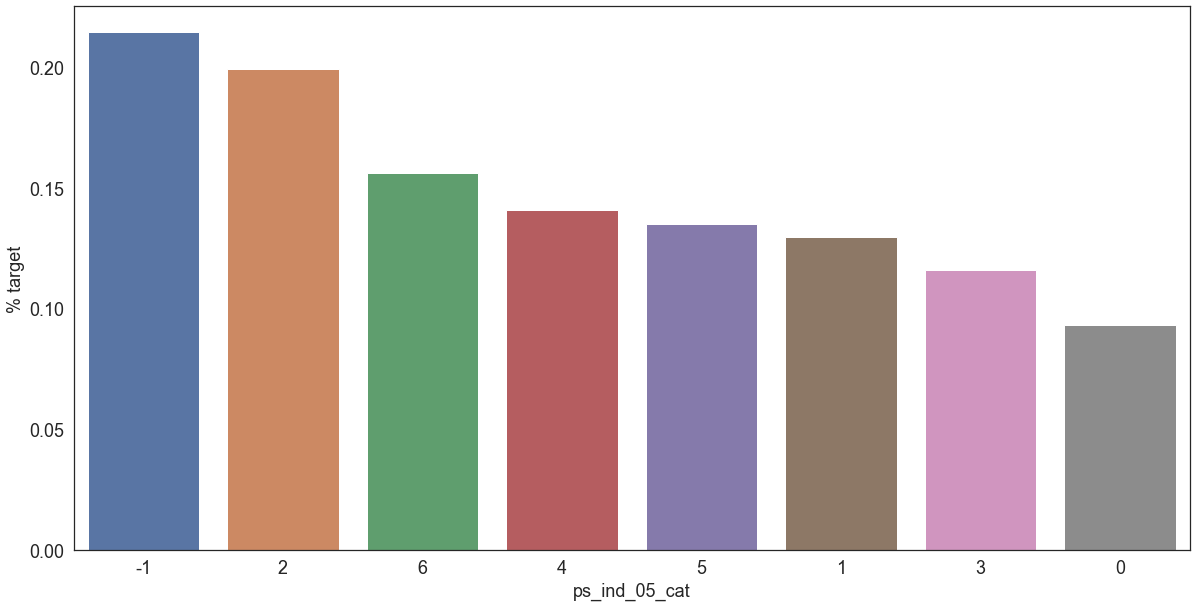

<Figure size 432x288 with 0 Axes>

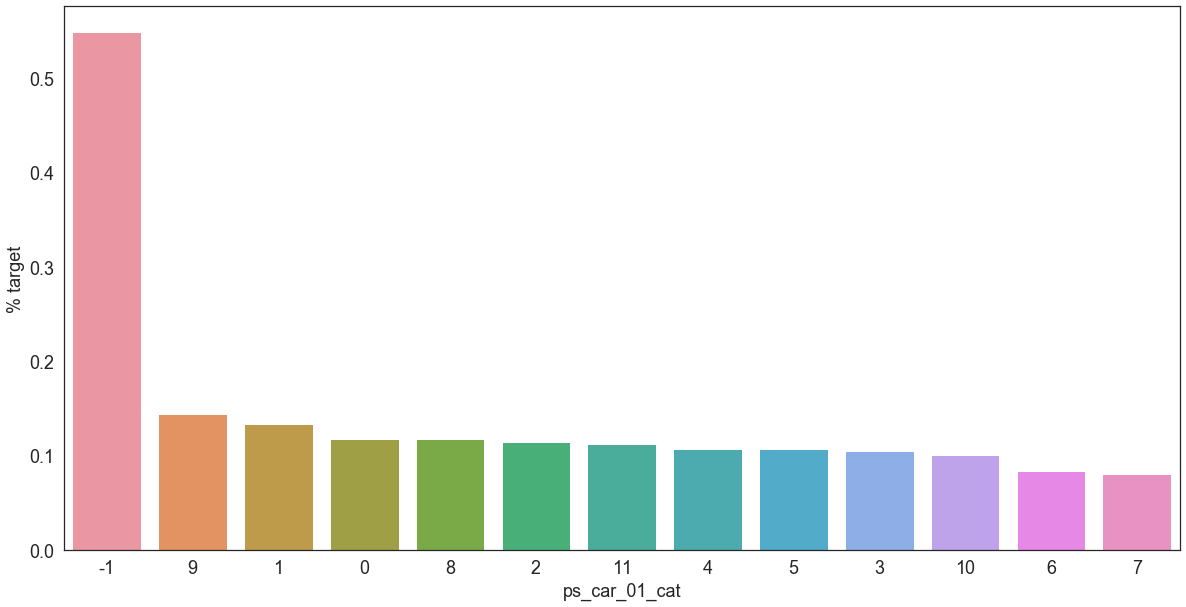

<Figure size 432x288 with 0 Axes>

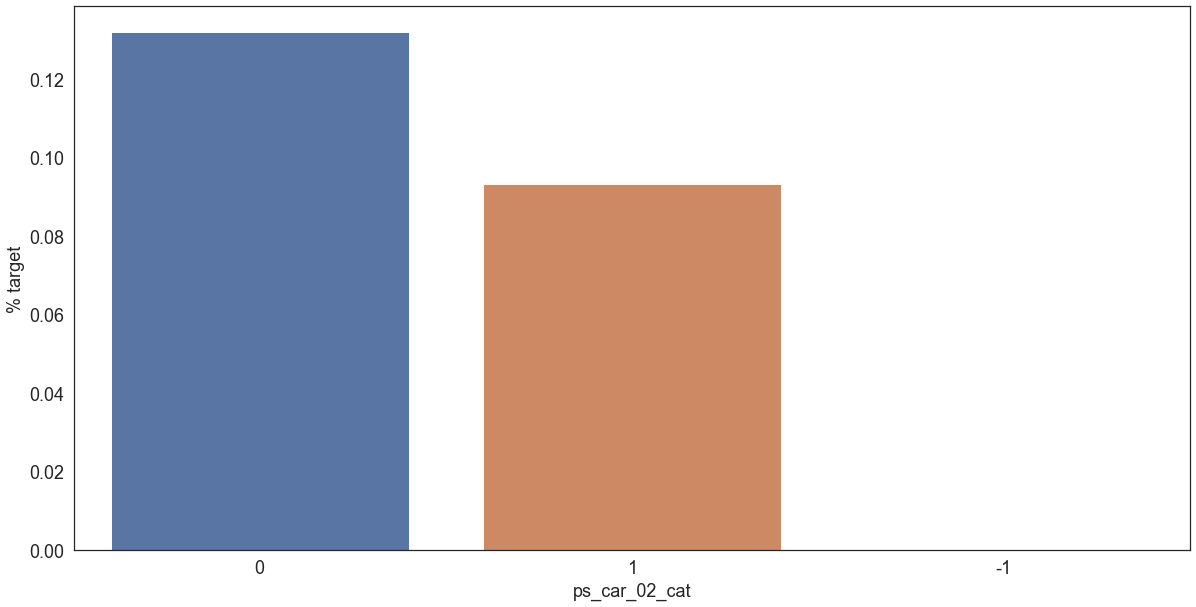

<Figure size 432x288 with 0 Axes>

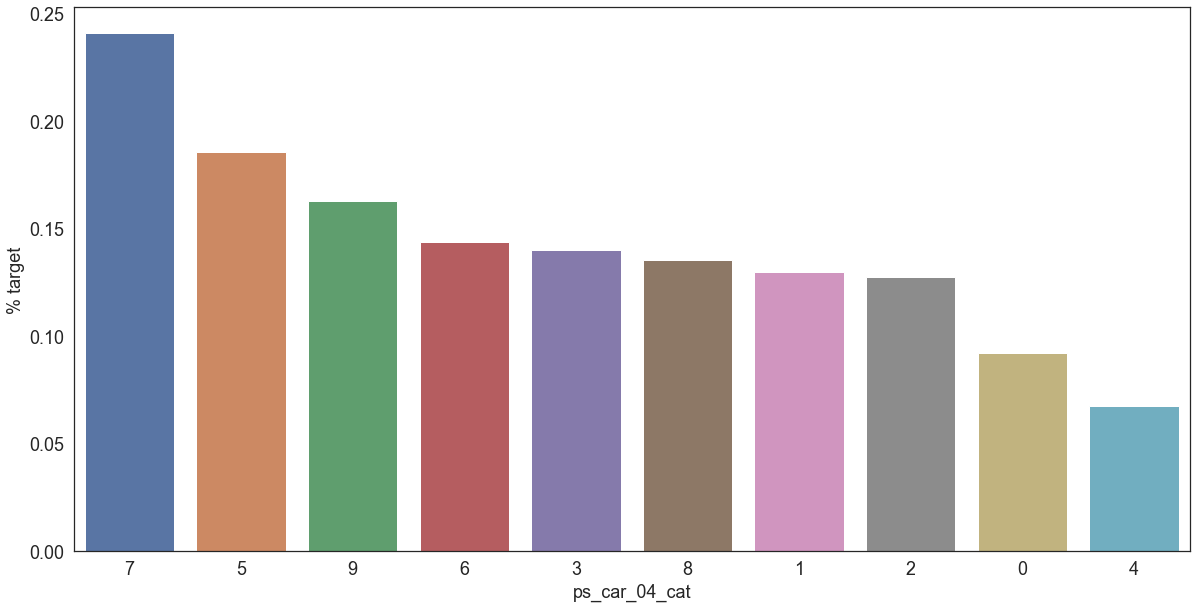

<Figure size 432x288 with 0 Axes>

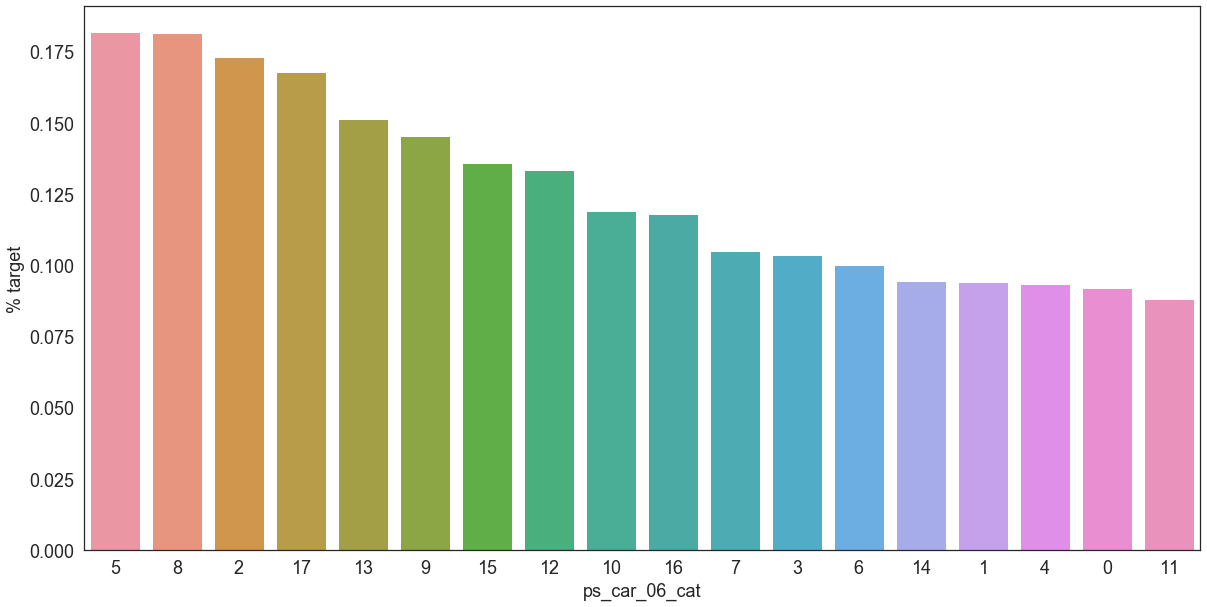

<Figure size 432x288 with 0 Axes>

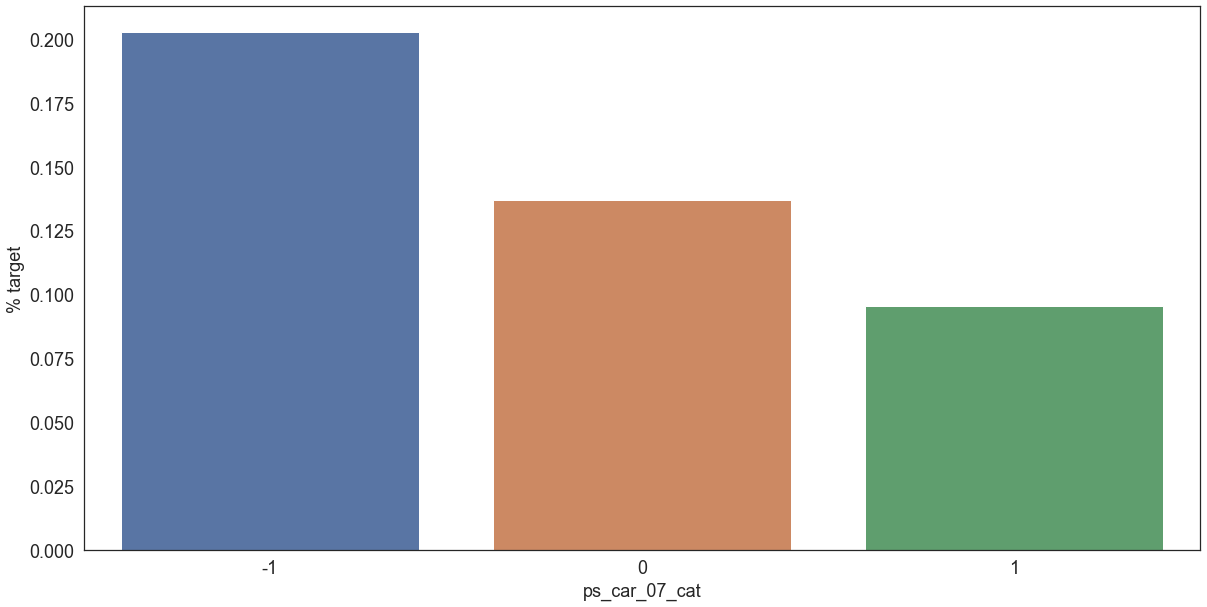

<Figure size 432x288 with 0 Axes>

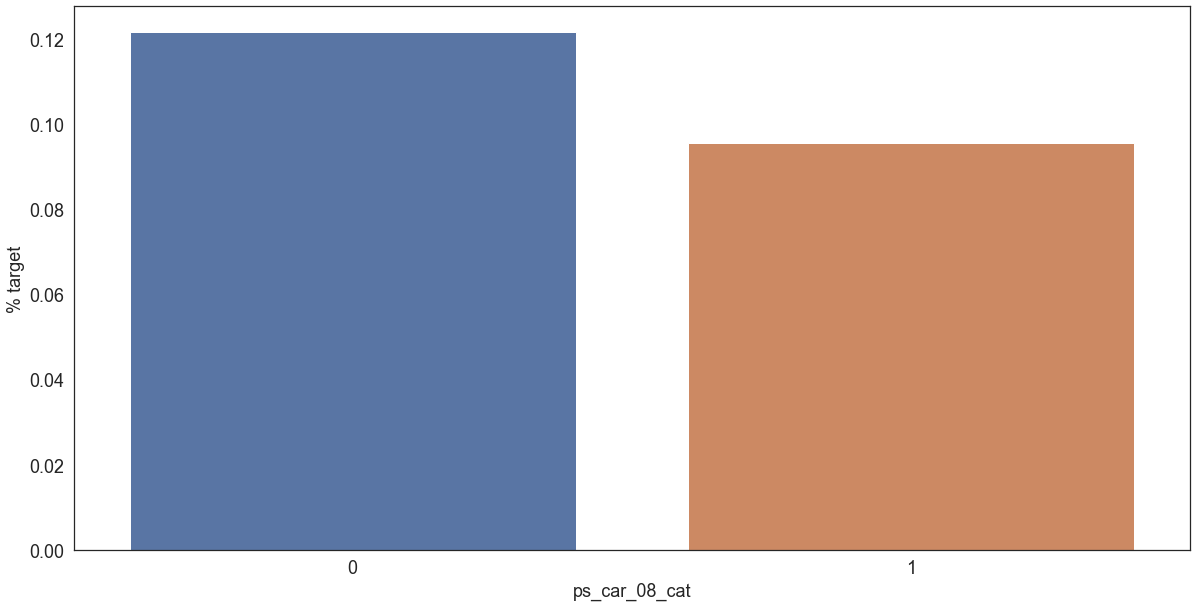

<Figure size 432x288 with 0 Axes>

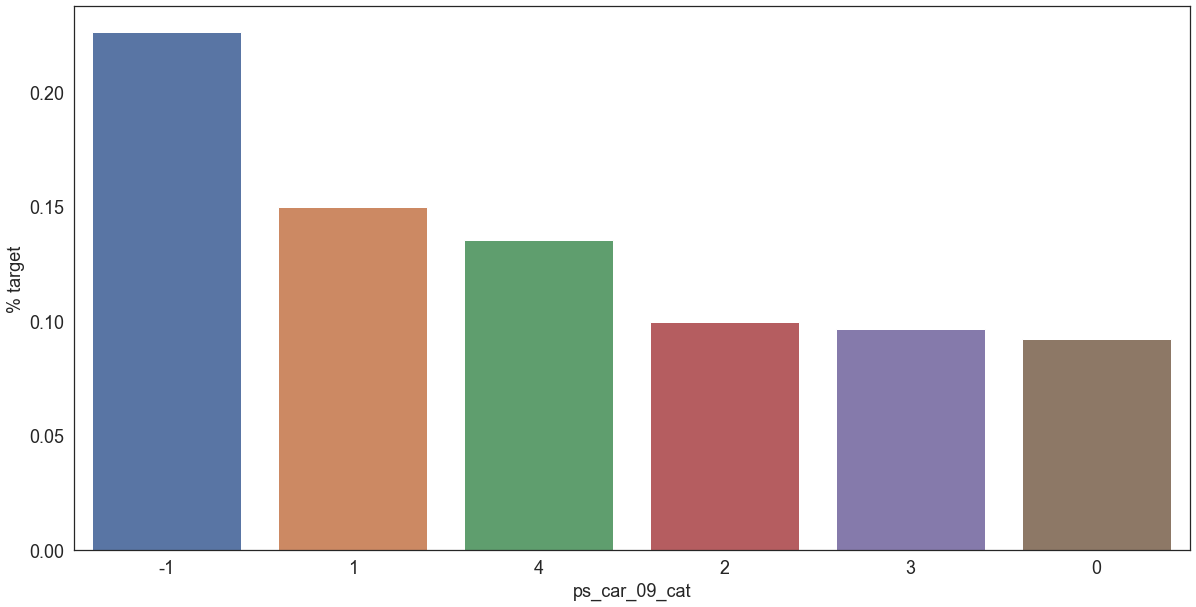

<Figure size 432x288 with 0 Axes>

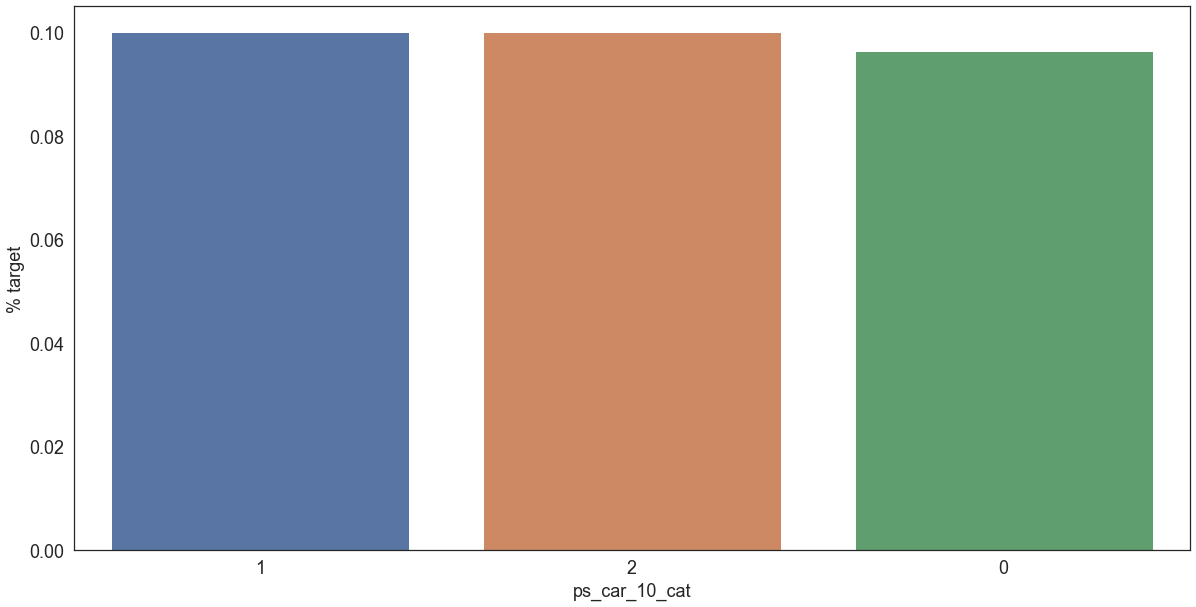

In [28]:
# Exploratory Data Visualization
# Categorical variables
v = meta[(meta.level == 'nominal') & meta.keep].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # order the vars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

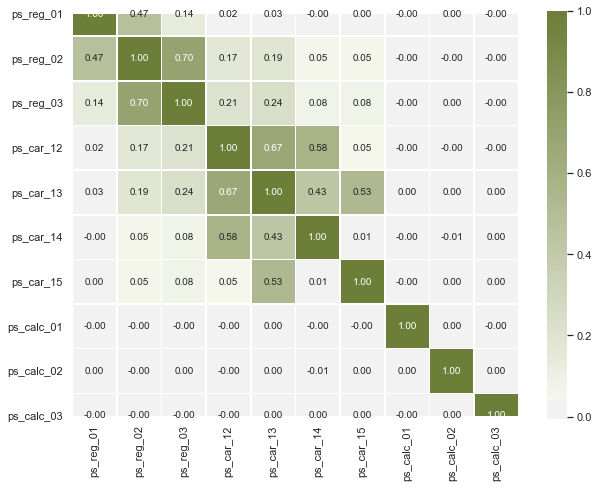

In [36]:
# interval variable
# heatmap
def corr_heatmap(v):
    correlations = train[v].corr()
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(200, 100, as_cmap=True, center='light')
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show()
    
g = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(g)

강한 상관관계를 갖는 변수들이 몇 개씩 보인다. 
변수들 간의 관계를 보는 그래프에는 heatmap 말고도 seaborn 의 pairplot 을 볼 수 있는데, 이미 히트맵을 그려보았기 때문에 그건 생략. pairplot 도 필요하다면 활용 가능.

seaborn.diverging_palette(h_neg, h_pos, s, l, n, center, as_cmap)
retruns palette or cmap
as_cmap : if true, return a matplotlib colormap object rather than a list of colors
s : Anchor saturation for both extents of the map.                                   l : lightness for both extents of the map
center : 사각형들 숫자 낮은거 'light' or 'dark'
h_neg, h_pos : anchor hues for negative and positive extents of the map
n : number of colors in the palette

cbar_kws : 막대기 크기를 줄이는 것
square : If True, set the Axes aspect to“equal”so each cell will be square-shaped. True 면 정사각형이 되고 아니면 직사각형이 된다. 그림 사이즈에 맞춰서?

In [30]:
# 조금 더 깊게 변수들을 알아보자
s = train.sample(frac=0.1)
# 데이터셋에서 랜덤으로 일부만 추출 -> 전부 다 그리면 너무 데이터가 많아서 오래 걸리니까 
# 그래프를 그릴 때는 이걸 왜 그리는지 생각

상관관계가 높은 변수들의 target 에 따른 차이를 알아보려고함.
상관관계가 높다? -> 변수가 겹친다 -> 차원축소를 위해, 다중공선성 문제 해소 등을 위해 정리해주는 것이 좋다.
Principal Component Analysis : PCA 진행
reduce the dimensions
그래서 어떤지 한번 그래프로 보는 것.
어떻게 변수들을 grouping 할 것인지, 어떤 더미 변수를 만들 것인지 등등 이후의 feature engineering 을 위해서

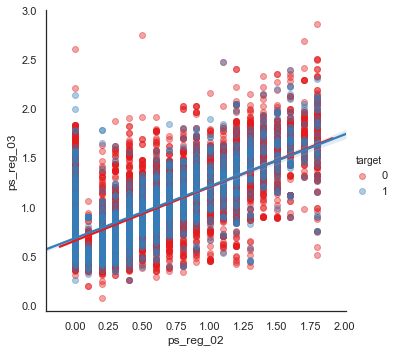

In [31]:
# ps_reg_02 and ps_reg_03
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, 
           hue='target', palette='Set1', scatter_kws={'alpha':0.4})
plt.show()

# alpha 는 점의 투명도를 말함.
# lmplot 은 산점도 + linear regression line plot

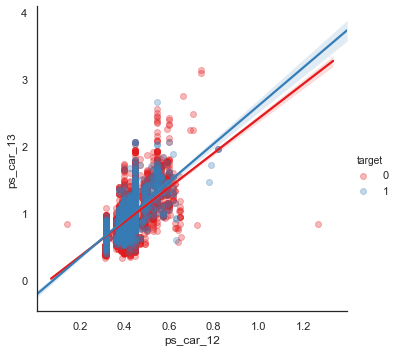

In [32]:
# ps_car_12 and ps_car_13
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1',
          scatter_kws={'alpha':0.3})
plt.show()

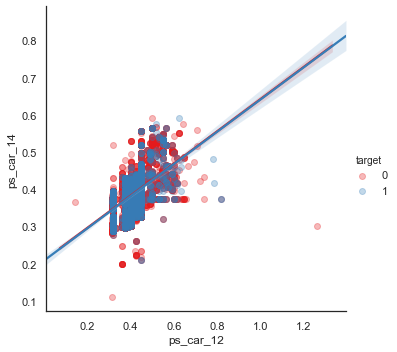

In [39]:
# ps_car_12 and ps_car_14
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

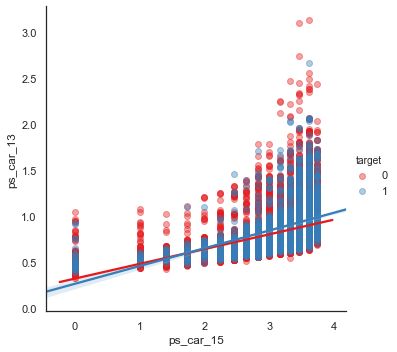

In [40]:
# ps_car_13 and ps_car_15
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.4})
plt.show()

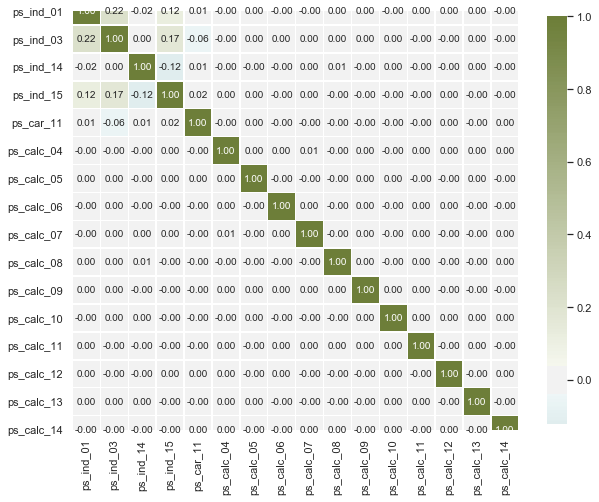

In [41]:
# Checking the correlations between ordinal variables
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)
# heatmap 짤리는건 matplotlib 3.1.1 버전 버그

순서형(서수형) meta 데이터들은 상관관계가 거의 없어보임. 어떻게 변수들을 그룹핑 할 것인지 고려해야함.
Feature engineering 수행

In [42]:
# Feature engineering
# Creating dummy variable
# - 범주형 변수의 값은 순서 또는 크기를 나타내지 않습니다.
# 예를 들어, 카테고리 2는 카테고리 1 값의 두 배가 아닙니다. 따라서 이를 처리하기 위해 더미변수를 작성할 수 있습니다.
# 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생 될 수 있으므로 첫 번째 더미 변수를 삭제합니다.
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


더미변수 생성 전후 column 수 비교
drop_first : k개의 카테고리에서 k-1 개의 더미변수를 얻을 것인지 removing the first level -> 왜 하는건지 알아봐야함.
default = False
더미변수란 범주형 변수를 연속형 변수로 변환한 것. 연속형 변수 같이 만드는 것
연속형 변수로만 가능한 분석기법을 사용하기 위해서 변환하는 것
ex. 다중회귀, 로지스틱 회귀 등등 대부분의 모델이 연속형이 아니면 분석기법 적용 불가
더미변수는 범주 개수보다 1개 적게 만들어진다.
예를 들어 남성, 여성이라고 하면 남성여부, 여성여부 둘 중 하나만 만들어지면 둘 다 설명이 가능하니까 k개 보다 1개가 적게 만들어짐.

In [43]:
# Creating interaction variables
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) # remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train=pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


sklearn.preprocessing.PolynomialFeatures (전처리)
PolynomialFeatures : 입력값 x를 다항식으로 변환, 다항차수 변환, 교호작용 변수 생성
-> 교호작용변수 생성! 어떻게 되는거냐면
변수가 (x1, x2) 2개 있을 때 -> PolynomialFeatures(degree=2) 를 하면 
x1, x2 ==> 1, x1, x2, x1^2, x1*x2, x2^2 이 생성된다
교호작용 변수만 만들기 interaction_only = True 
상수항 생성 여부 include_bias = False, True
차원의 수 degree -> 차원은 x1, x2, x1^3, x1^2x2, .. 이런거 생각하면 될듯
* sklearn.preprocessing.Binarizer() : 연속형 변수의 이항변수화
* sklearn.preprocessing.OneHotEncoder() : 범주형 변수의 이항변수화

In [46]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [54]:
polynominal=PolynomialFeatures(degree=2)
polynominal.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [57]:
# featrue selection
# removing features with low or zero vaiance
selector = VarianceThreshold(threshold=0.01) # 0.01 (1%) 이하의 값을 제거하려고 하는듯 
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables 

f = np.vectorize(lambda x : not x) # function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('There variables are {}'.format(list(v)))

28 variables have too low variance.
There variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [58]:
train.shape

(216940, 164)

왜 제거하는지?
제거하면 성능이 올라가는지? -> 모델에 적용할 input 변수를 잘 선정하는 것은 모델의 성능에 직접적인 영향을 미침.
1% 보다 낮은 variance 가 뭔지? 숫자가 낮다?
열을 통째로 삭제한게 아니라 0.01 이하 값 행을 삭제한것?
< Feature selection > 
Variance Threshold -> variance(변화량, 분산) 가 threshold 보다 작은 변수를 제거함.
variance 가 낮다는 것은 변수 안에 같은 갑싀 데이터가 많다는 의미. 예를들어 변수의 데이터의 다수가 0으로 채워져 있는 경우.
variance threshold 는 독립변수x 와 종속변수y 간의 관계를 고려하지 않기 때문에 분석 차원에서 제거시 종속변수를 제외하고 진행하는 것이 좋음.

삭제 하는 방법도 분산이 아니라 다른 방법을 보고 삭제하는 방법도 다수 있음.
참고사이트 https://comafire.github.io/pages/ml-feature-selection/
https://subinium.github.io/feature-selection/
sklearn 에 feature selection methods 다양하게 많이 있음.

In [62]:
# Selecting features with a Random forest and SelectFromModel
# 랜덤포레스트로 주요 변수 선택 and 모델을 통한 변수 선택법
X_train = train.drop(['id', 'target'], axis=1)
Y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train, Y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021088
 2) ps_car_13 ps_car_14            0.017426
 3) ps_reg_03 ps_car_13            0.017385
 4) ps_car_13                      0.017213
 5) ps_car_12 ps_car_13            0.017137
 6) ps_car_13^2                    0.017117
 7) ps_car_13 ps_car_15            0.016965
 8) ps_reg_01 ps_car_13            0.016794
 9) ps_reg_03 ps_car_14            0.016297
10) ps_reg_03 ps_car_12            0.015518
11) ps_reg_03 ps_car_15            0.015041
12) ps_car_14 ps_car_15            0.015039
13) ps_car_13 ps_calc_01           0.014793
14) ps_car_13 ps_calc_02           0.014687
15) ps_car_13 ps_calc_03           0.014644
16) ps_reg_02 ps_car_13            0.014642
17) ps_reg_01 ps_reg_03            0.014592
18) ps_reg_03                      0.014341
19) ps_reg_01 ps_car_14            0.014340
20) ps_reg_03^2                    0.014218
21) ps_reg_03 ps_calc_01           0.013747
22) ps_reg_03 ps_calc_03           0.013630
23) ps_reg_03 ps_calc_02        

In [63]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number od features after selection {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number od features after selection 81


In [64]:
train = train[selected_vars + ['target']]

In [66]:
# feature scaling
# standard scaling to the training data.
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])